# Aula 01 - Análise exploratória 

Documentos de referência:

- https://pandas.pydata.org/docs/reference/frame.html
- https://matplotlib.org/stable/users/index.html
- https://seaborn.pydata.org/tutorial.html
- https://docs.python.org/3/library/re.html

### Carregar bibliotecas

In [1]:
# Carregando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Carregar conjuntos de dados

In [2]:
# Carregar os datasets
clientes_df = pd.read_csv('CSV/dados_clientes.csv', encoding='latin-1', dtype = str)
vendas_df = pd.read_csv('CSV/dados_vendas.csv', encoding='latin-1', dtype = str)

In [3]:
vendas_df

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID
0,1,489460,79323P,PINK CHERRY LIGHTS,8,1.12.2009 10:46,6.75,16167
1,2,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,1.12.2009 10:46,0.55,16167
2,3,489460,84991,60 TEATIME FAIRY CAKE CASES,24,1.12.2009 10:46,0.55,16167
3,4,489460,22274,FELTCRAFT DOLL EMILY,6,1.12.2009 10:46,2.95,16167
4,5,489460,22273,FELTCRAFT DOLL MOLLY,6,1.12.2009 10:46,2.95,16167
...,...,...,...,...,...,...,...,...
79800,79801,580500,21155,RED RETROSPOT PEG BAG,1,4.12.2011 12:52,2.55,17131
79801,79802,580500,21035,SET/2 RED RETROSPOT TEA TOWELS,1,4.12.2011 12:52,3.25,17131
79802,79803,580500,22602,RETROSPOT WOODEN HEART DECORATION,6,4.12.2011 12:52,0.85,17131
79803,79804,580500,23461,SWEETHEART BIRD HOUSE,1,4.12.2011 12:52,4.15,17131


In [4]:
clientes_df

,Unnamed: 0,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id
0,1,Martina Avila,cubilia.Curae.Phasellus#quisaccumsanconvallis.edu,Bulgaria,0,41.8517198,62812.09301,11609.38091,238961.2505,13480
1,2,Harlan Barnes,eu.dolor#diam.co.uk,Belize,0,40.87062335,66646.89292,9572.957136,530973.9078,16852
2,3,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15289747,53798.55112,11160.35506,638467.1773,16833
3,4,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27136945,79370.03798,14426.16485,548599.0524,16893
4,5,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31374945,59729.1513,5358.712177,560304.0671,14613
...,...,...,...,...,...,...,...,...,...,...
495,496,Walter,ligula@Cumsociis.ca,Nepal,0,41.46251483,71942.40291,6995.902524,541670.1016,15366
496,497,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.64199977,56039.49793,12301.45679,360419.0988,17588
497,498,Pearl,penatibus.et@massanonante.com,Philippines,1,53.94349722,68888.77805,10611.60686,764531.3203,12887
498,499,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.16050864,49811.99062,14013.03451,337826.6382,18053


### Tratamentos iniciais

* Remoção de colunas indesejadas
* Verificação e remoção de valores ausentes
* Correção e-mails inválidos 
* Conversão de tipos de dados

* Vamos remover as colunas de índice nomeadas como 'Unnamed: 0' que não serão necessárias para nosso projeto

In [5]:
clientes_df = clientes_df.drop('Unnamed: 0', axis='columns')
vendas_df = vendas_df.drop('Unnamed: 0', axis='columns')

* Na sequência vamos usar a função **.isnull()** para somar os valores ausentes nas duas tabelas. Depois vamos usar **.dropna()** para remover as linhas sem valores.

In [6]:
# Verificar valores ausentes
print('\nValores ausentes em Dados Clientes:')
print(clientes_df.isnull().sum())
print('Valores ausentes em Dados Vendas:')
print(vendas_df.isnull().sum())


Valores ausentes em Dados Clientes:
customer.name       0
customer.e.mail     0
country             0
gender              0
age                 0
annual.Salary       0
credit.card.debt    0
net.worth           2
client_id           2
dtype: int64
Valores ausentes em Dados Vendas:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer.ID    2
dtype: int64


In [7]:
# Remover linhas com valores ausentes
clientes_df = clientes_df.dropna(subset=['net.worth', 'client_id'])
vendas_df = vendas_df.dropna(subset=['Customer.ID'])

### Expressão Regular (Regex)
A expressão regular r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$' é usada para definir um padrão para correspondência de strings:

* **^** Indica o início da string
* **$** Indica o fim da string

#### Parte01(nome): *^[a-zA-Z0-9._%+-]+*
#### Parte02(domínio): *@[a-zA-Z0-9.-]*
#### Parte03(.com): *\.[a-zA-Z]{2,}*

A função **validar_email** usa a expressão regular para verificar se um e-mail é válido. A função **re.match** tenta encontrar uma correspondência entre a expressão e a string de e-mail. Se a correspondência for encontrada retorna um objeto, caso não seja retorna "None".

A função **bool** converte o resultado da correspondência em um valor booleano. Se a correspondência for encontrada retorna "True", caso nenhuma seja encontrada "False"

In [8]:
# Definir a função de validação de e-mail usando Regex
def validar_email(email):
    email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(email_regex, email))

# Aplicar a função de validação de e-mail
clientes_df['email_valido'] = clientes_df['customer.e.mail'].apply(validar_email)

# Filtrar e-mails inválidos
emails_invalidos = clientes_df[clientes_df['email_valido'] == False]

# Exibir e-mails inválidos
print("E-mails inválidos encontrados:")
print(emails_invalidos['customer.e.mail'])

E-mails inválidos encontrados:
0     cubilia.Curae.Phasellus#quisaccumsanconvallis.edu
1                                   eu.dolor#diam.co.uk
62               est.Nunc.laoreet#nullavulputatedui.edu
67                                eu.odio#tristique.org
68                                          enim#at.net
70                     ac.orci#Etiamimperdietdictum.edu
71                  congue.elit#vestibulumneceuismod.ca
72                       neque#variusultricesmauris.edu
73                          facilisis#Nullainterdum.edu
74                            libero.nec#adipiscing.org
75                                   eleifend#felis.org
76                               cursus#nectellus.co.uk
77                       Aliquam.rutrum.lorem#Donec.net
78                   dictum.mi.ac#semperrutrumFusce.com
79                                    pede.et#Sedeu.com
80                                       sit#pedeCum.ca
81                                      lacus#velit.edu
82               

* Usar a função **str.contains** para contar os e-mails que possuem o caractere # e **str.replace** com regex para realizar a substituição. A flag **regex=True** garante que a substituição é feita utilizando expressões regulares.

In [11]:
# Contar a quantidade de e-mails que possuem '#' ao invés de '@'
emails_invalidos = clientes_df['customer.e.mail'].str.contains('#').sum()
print(f'Número de e-mails com "#": {emails_invalidos}')

Número de e-mails com "#": 0


In [12]:
# Substituir '#' por '@' na coluna de e-mail usando regex
clientes_df['customer.e.mail'] = clientes_df['customer.e.mail'].str.replace(r'#', '@', regex=True)

### Função para Conversão de Colunas

In [18]:
# Verificar e corrigir tipos de dados novamente
print('\nTipos de dados na tabela Clientes:')
print(clientes_df.dtypes)
print('\nTipos de dados na tabela Vendas:')
print(vendas_df.dtypes)


Tipos de dados na tabela Clientes:
customer.name        object
customer.e.mail      object
country              object
gender               object
age                   int32
annual.Salary       float64
credit.card.debt    float64
net.worth           float64
client_id            object
email_valido           bool
dtype: object

Tipos de dados na tabela Vendas:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer.ID            object
dtype: object


* A coluna 'InvoiceDate' separa as datas por ponto fazendo com que a coluna seja do tipo object. Isso dificulta a análise descritiva e por consequência o desenvolvimento do estudo RFV. Vamos converter a coluna usando o método **pd.to_datetime**

* Todas as colunas estão em formato de objeto (string). No dia-a-dia isso é extremamente comum, muitas vezes os conjuntos de dados trabalhados não vai estar no formato de dados adequado e será necessário realizar o tratamento dos dados antes de qualquer análise avançada. Aqui podemos usar vários métodos (astype ou pd.to_numeric) do Pandas. Vamos escolher o **'pd.to_numeric'**

In [15]:
# Converter a colunas sem usar função
#vendas_df['InvoiceDate'] = pd.to_datetime(vendas_df['InvoiceDate'])   

#clientes_df['gender'] = pd.to_numeric(clientes_df['gender'])
#clientes_df['age'] = pd.to_numeric(clientes_df['age'])
#clientes_df['annual.Salary'] = pd.to_numeric(clientes_df['annual.Salary'])
#clientes_df['credit.card.debt'] = pd.to_numeric(clientes_df['credit.card.debt'])
#clientes_df['net.worth'] = pd.to_numeric(clientes_df['net.worth'])

## Usando **pd.to_numeric** em uma função

In [16]:
# Criar a função
def convert_columns(df, conversions):
    for column, conv_type in conversions.items():
        if conv_type == 'numeric':
            df[column] = pd.to_numeric(df[column])
        elif conv_type == 'datetime':
            df[column] = pd.to_datetime(df[column])
    return df

# Definir conversões 
vendas_conversions = {
    'InvoiceDate': 'datetime',
    'Price': 'numeric',
    'Quantity': 'numeric'
}


clientes_conversions = {
    'age': 'numeric',
    'annual.Salary': 'numeric',
    'credit.card.debt': 'numeric',
    'net.worth': 'numeric'
}

# Aplicar conversões
vendas_df = convert_columns(vendas_df, vendas_conversions)
clientes_df = convert_columns(clientes_df, clientes_conversions)

* Notamos também que a coluna 'age' contém a idade dos clientes em formato decimal, exemplo '42.18'. Para resolver isso vamos precisar usar o método **.round**

In [19]:
# Arredondar a coluna 'age' para inteiros
clientes_df['age'] = clientes_df['age'].astype(int)
clientes_df

,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id,email_valido
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,13480,False
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,16852,False
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,16833,True
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,16893,True
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,14613,True
...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41,71942.40291,6995.902524,541670.1016,15366,True
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37,56039.49793,12301.456790,360419.0988,17588,True
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53,68888.77805,10611.606860,764531.3203,12887,True
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59,49811.99062,14013.034510,337826.6382,18053,True


* Por fim vamos criar a coluna de receita multiplicando a quantidade vendida pelo preço unitário de cada produto

In [20]:
vendas_df['TotalPrice'] = vendas_df['Quantity'] * vendas_df['Price']

## Análise descritiva (EDA)

* Estatísticas descritivas
* Visualização de dados (histogramas e boxplots)
* Matriz de correlação 
* Análise de produtos

* Para começar vamos usar o método **.describe()** para obter as estatísticas descritivas das 2 tabelas. Na sequência vamos usar dois gráficos diferentes do seaborn. **histplot** e **boxplot**.

In [21]:
vendas_df.describe()

,Quantity,Price,TotalPrice
count,79803.000000,79803.000000,79803.000000
mean,9.461048,3.526941,16.546709
std,21.850367,23.427976,36.705978
min,-1200.000000,0.000000,-4217.590000
25%,2.000000,1.250000,5.000000
50%,6.000000,1.950000,12.600000
75%,12.000000,3.750000,19.500000
max,2160.000000,4217.590000,1687.170000


In [22]:
clientes_df.describe()

,age,annual.Salary,credit.card.debt,net.worth
count,498.000000,498.000000,498.000000,498.000000
mean,45.759036,62120.153806,9600.480161,431626.591326
std,8.000639,11726.330717,3494.225646,173782.204586
min,20.000000,20000.000000,100.000000,20000.000000
25%,40.000000,54385.824465,7384.385873,299764.150500
50%,45.500000,62851.979285,9648.837620,426750.120650
75%,51.000000,70130.506415,11792.524153,557775.508975
max,70.000000,100000.000000,20000.000000,1000000.000000


### Gráfico de Histograma

O histograma é uma representação gráfica da distribuição de uma variável numérica, agrupando os dados em intervalos (bins). Ele nos dá uma visão geral da distribuição dos dados, mostrando a frequência de valores dentro de cada intervalo.

### Interpretação do Histograma

No histograma podemos observar:

* A forma geral da distribuição das idades dos clientes.
* A centralização e dispersão dos dados.
* A presença de qualquer tendência ou padrão (por exemplo, uma distribuição normal, assimetria, etc.).
* Áreas de alta e baixa densidade de dados.


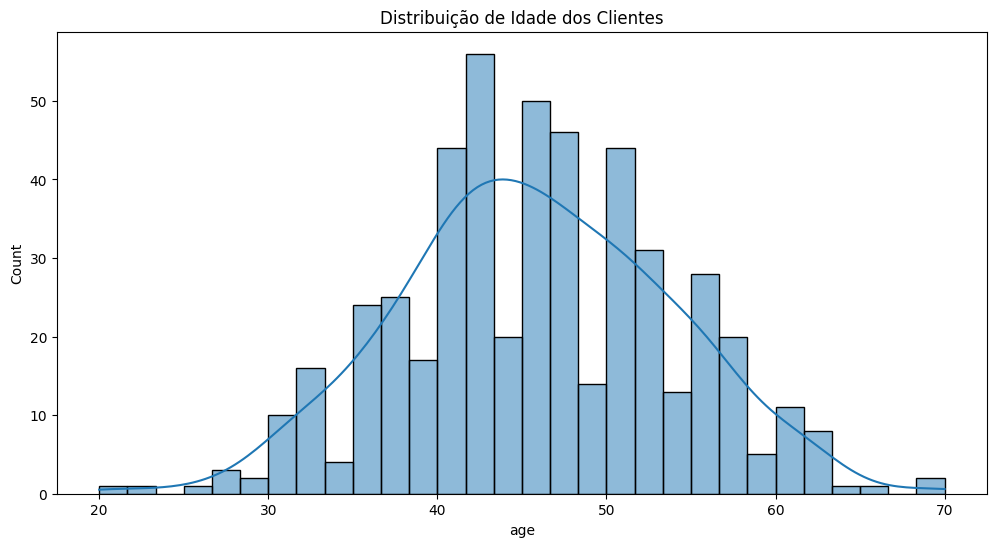

In [23]:
# Histograma da idade dos clientes
plt.figure(figsize=(12, 6))
sns.histplot(clientes_df['age'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.show()

### Gráfico de Boxplot

O boxplot, também conhecido como diagrama de caixa, ele ajuda a visualizar a distribuição de um conjunto de dados. Exibe a mediana, os quartis e os valores atípicos de forma visual. Os principais elementos são:

**Mediana (linha dentro da caixa):**
* Representa o valor central dos dados.
* No boxplot de salários anuais por gênero, a linha dentro da caixa mostra o salário mediano para cada gênero.

**Quartis (caixa):**
* A caixa vai do primeiro quartil (Q1) ao terceiro quartil (Q3), abrangendo o interquartil range (IQR), que representa os 50% intermediários dos dados.
* O Q1 é o valor abaixo do qual estão 25% dos dados, e o Q3 é o valor abaixo do qual estão 75% dos dados.

**Bigodes (linhas que se estendem das caixas):**
* Mostram a variabilidade fora dos quartis.
* O limite dos bigodes geralmente é definido como 1,5 vezes o IQR a partir dos quartis.
* No gráfico, os bigodes mostram a extensão dos salários que não são considerados valores atípicos.

**Valores atípicos ou Outliers (pontos fora dos bigodes):**
* Representam valores que estão fora do alcance dos bigodes e são considerados anomalias ou exceções, também chamados de outliers

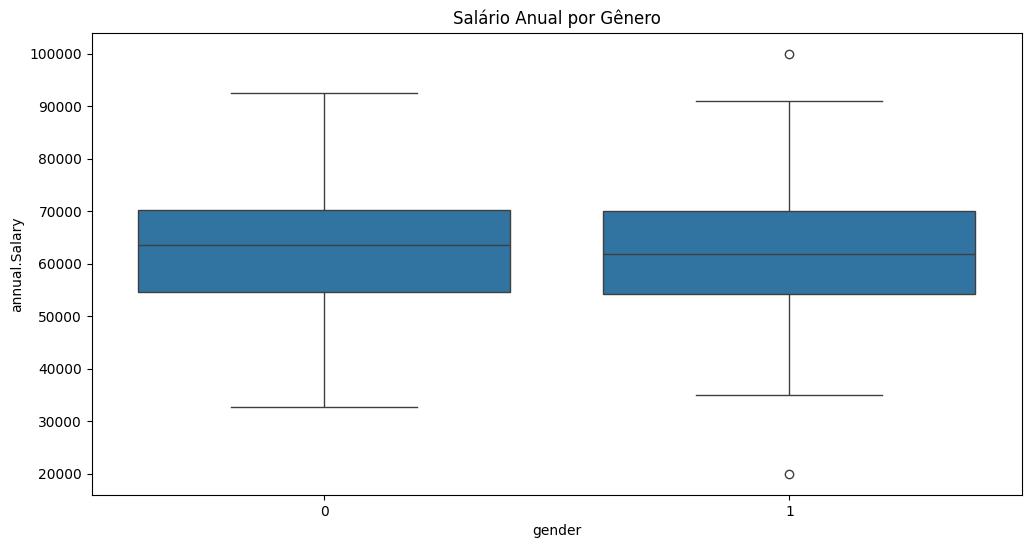

In [24]:
# Boxplot do salário anual por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='annual.Salary', data=clientes_df)
plt.title('Salário Anual por Gênero')
plt.show()

* Se observarmos a tabela vendas, temos uma grande variedade de produtos. Para iniciar, vamos usar o método **'nunique()'** para descobrir quantos produtos únicos temos na nossa tabela

In [25]:
# Contar a quantidade de IDs de produto únicas
vendas_df['StockCode'].nunique()

3939

* Na tabela dados_vendas, temos mais de 3939 produtos. Por isso vamos filtrar apenas os mais vendidos em quantidade e receita usando o método **'groupby'**, somando as duas colunas

In [26]:
# Agrupar por ID do produto e somar a quantidade vendida
produtos_agg = vendas_df.groupby('StockCode')[['Quantity','TotalPrice']].sum().reset_index()

# Ordenar pelo total de quantidade vendida em ordem decrescente
produtos_agg = produtos_agg.sort_values(by='Quantity', ascending=False)

# Selecionar os 15 produtos com maior quantidade vendida
produtos_agg = produtos_agg.head(15)

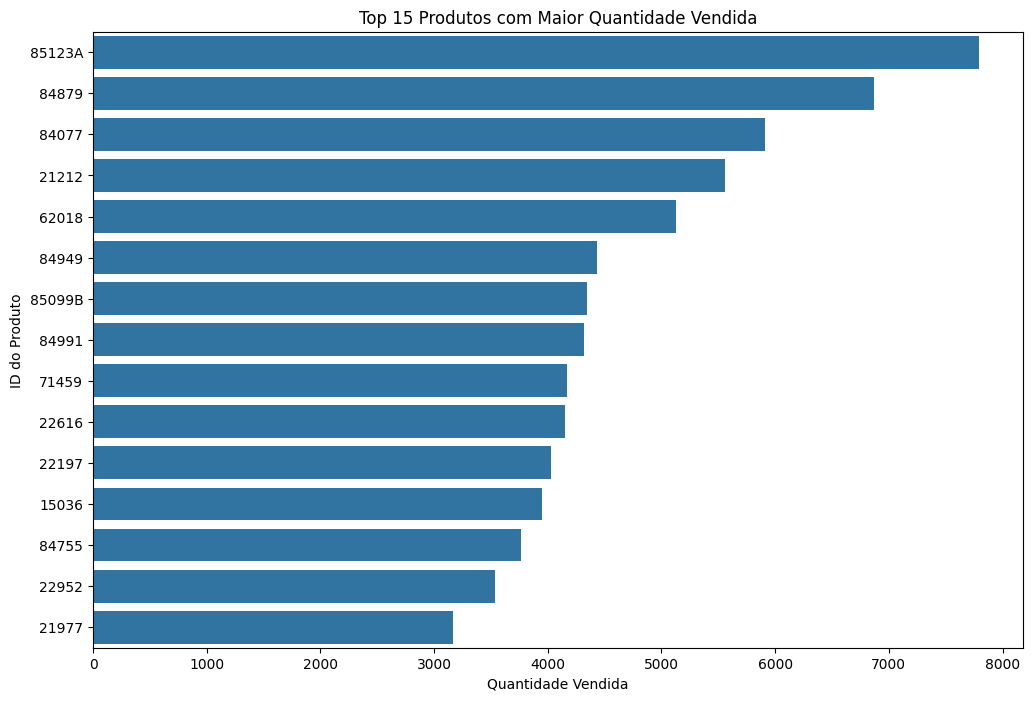

In [27]:
# Plotar os 15 produtos com maior quantidade vendida
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='StockCode', data=produtos_agg)
plt.title('Top 15 Produtos com Maior Quantidade Vendida')
plt.xlabel('Quantidade Vendida')
plt.ylabel('ID do Produto')
plt.show()

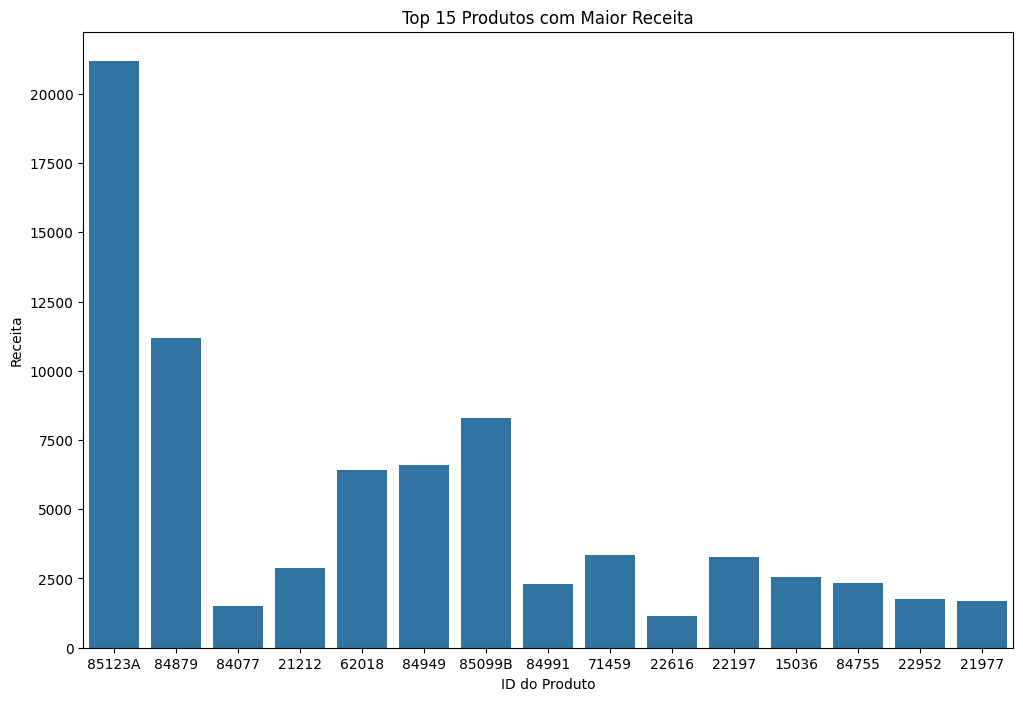

In [28]:
# Plotar os 15 produtos com maior quantidade vendida
plt.figure(figsize=(12, 8))
sns.barplot(x='StockCode', y='TotalPrice', data=produtos_agg)
plt.title('Top 15 Produtos com Maior Receita')
plt.xlabel('ID do Produto')
plt.ylabel('Receita')
plt.show()

### Matriz de correlação

Para obter a correlação entre as variáveis da nossa tabela gold vamos usar o método **.corr()**. Em seguida vamos plotar uma matriz de correlação usando matplotlib e seaborn

In [29]:
# Realizar o merge entre os dois DataFrames
tabela_gold = pd.merge(vendas_df, clientes_df, left_on='Customer.ID', right_on='client_id')
tabela_gold.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,TotalPrice,customer.name,customer.e.mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,client_id,email_valido
0,489460,79323P,PINK CHERRY LIGHTS,8,2009-01-12 10:46:00,6.75,16167,54.0,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,True
1,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,13.2,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,True
2,489460,84991,60 TEATIME FAIRY CAKE CASES,24,2009-01-12 10:46:00,0.55,16167,13.2,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,True
3,489460,22274,FELTCRAFT DOLL EMILY,6,2009-01-12 10:46:00,2.95,16167,17.7,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,True
4,489460,22273,FELTCRAFT DOLL MOLLY,6,2009-01-12 10:46:00,2.95,16167,17.7,Holly,accumsan@parturientmontes.net,Micronesia,1,44,60487.90116,9911.037592,478428.7174,16167,True


C:\Users\alvaro.trindade_ghfl\AppData\Local\Temp\ipykernel_7436\2835177124.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tabela_gold.corr()


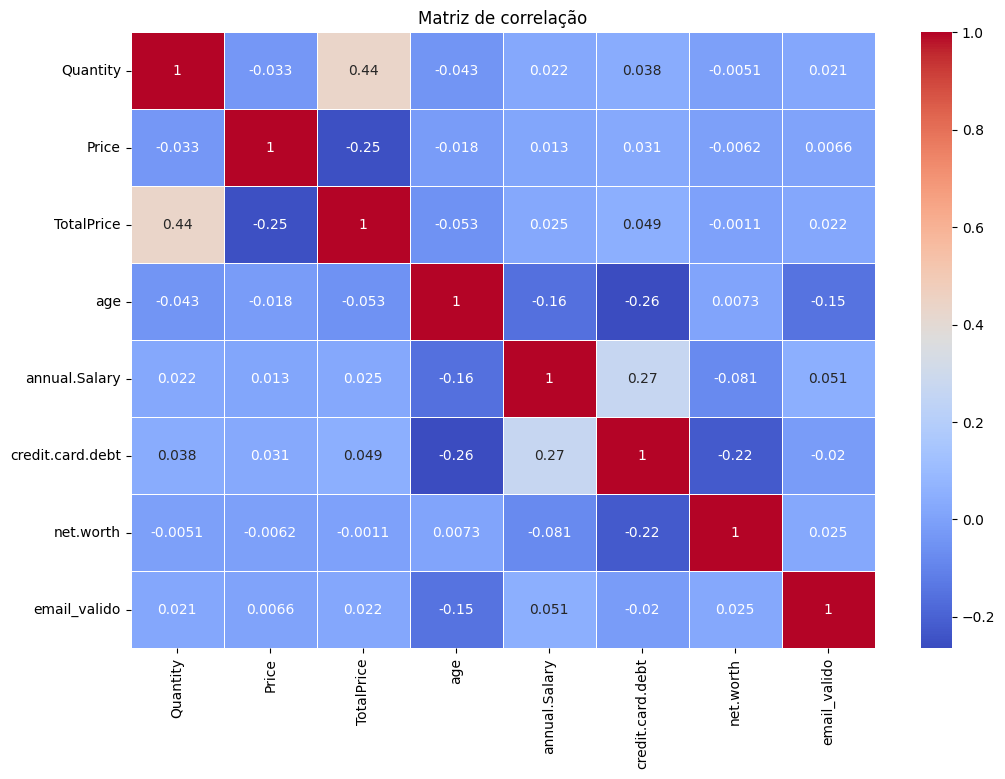

In [30]:
# Calcular matriz de correlação
correlation_matrix = tabela_gold.corr()

# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlação')
plt.show()

* Para descobri a média salarial por país podemos combinar os métodos **'.groupy'** com **'.mean'**

In [31]:
# Agrupar dados por país e calcular a média de salário anual
salario_medio_pais = clientes_df.groupby('country')['annual.Salary'].mean().reset_index()
salario_medio_pais = salario_medio_pais.sort_values(by='annual.Salary', ascending=False)
print('\nSalário médio por país:')
salario_medio_pais


Salário médio por país:


,country,annual.Salary
46,Denmark,100000.000000
193,Ukraine,92455.728070
119,Moldova,88816.026950
22,"Bonaire, Sint Eustatius and Saba",86565.156410
88,Japan,84171.167190
...,...,...
23,Bosnia and Herzegovina,43685.585890
134,Niue,40344.207685
2,American Samoa,38453.860330
131,Nicaragua,37336.338300


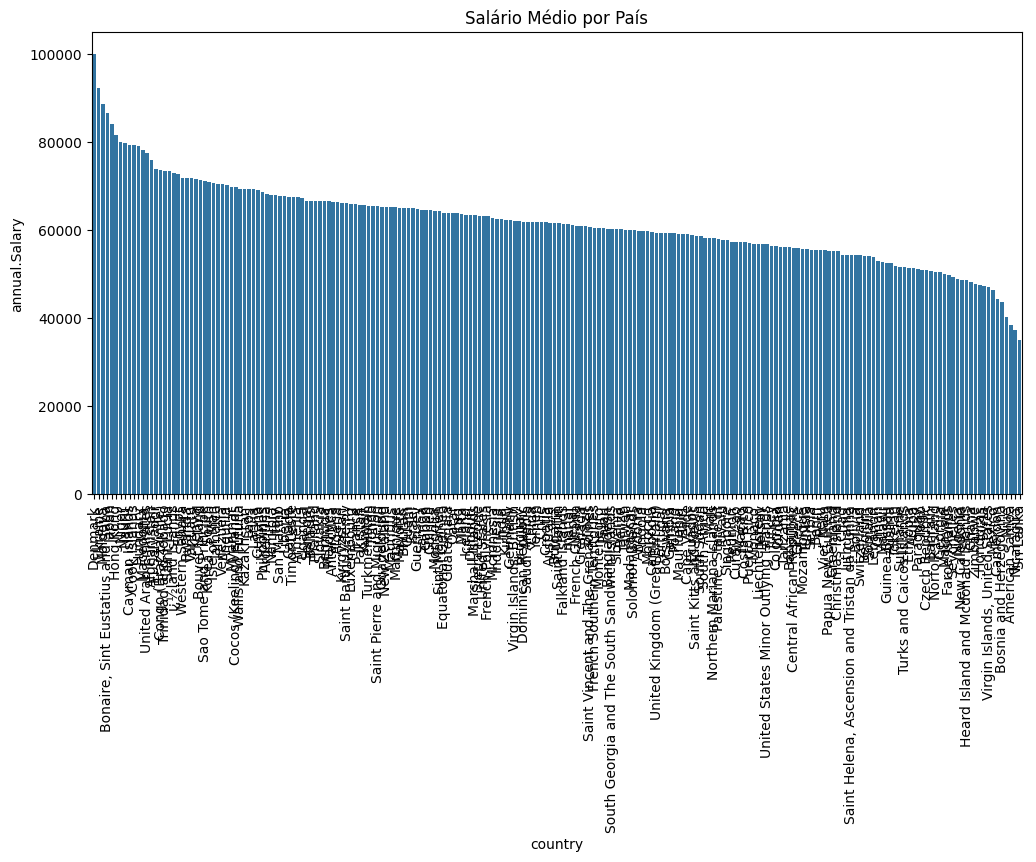

In [32]:
# Gráfico de barras do salário médio por país
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='annual.Salary', data=salario_medio_pais)
plt.xticks(rotation=90)
plt.title('Salário Médio por País')
plt.show()

In [33]:
# Lista de países selecionados
paises_selecionados = ['Brazil', 'Argentina', 'USA', 'Canada', 'Germany', 'France', 'Portugal', 'Colombia']

# Filtrar o DataFrame para incluir apenas os países selecionados
clientes_selecionados_df = clientes_df[clientes_df['country'].isin(paises_selecionados)]

In [34]:
# Agrupar dados por país e calcular a média de salário anual
salario_medio_pais = clientes_selecionados_df.groupby('country')['annual.Salary'].mean().reset_index()
print('\nSalário médio por país:')
print(salario_medio_pais)


Salário médio por país:
     country  annual.Salary
0  Argentina   68325.727960
1     Brazil   60909.575777
2     Canada   67689.482735
3   Colombia   56488.423637
4     France   65930.280375
5    Germany   62262.948450
6   Portugal   59473.025060


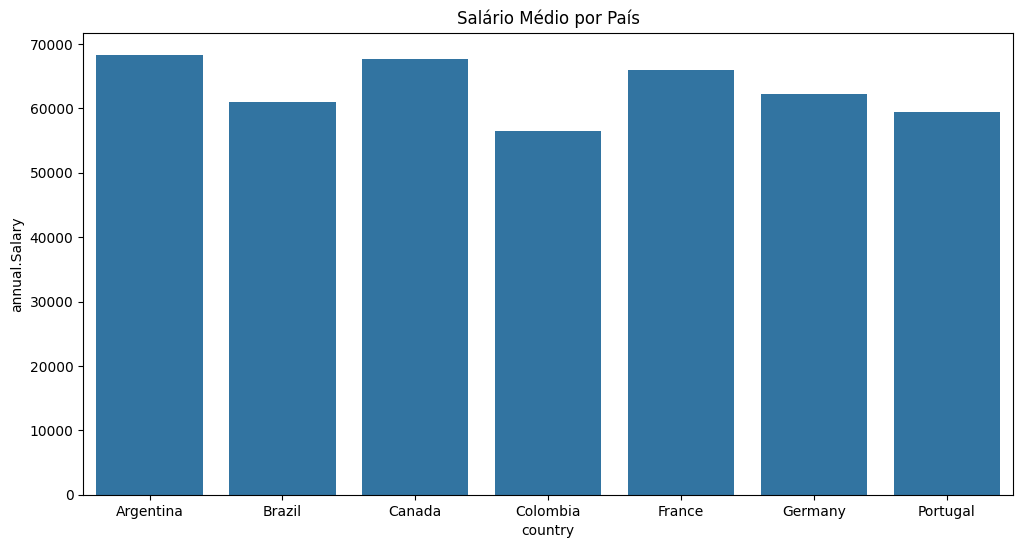

In [35]:
# Gráfico de barras do salário médio por país
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='annual.Salary', data=salario_medio_pais)
plt.title('Salário Médio por País')
plt.show()

# Customer lifetime value (CLV e CLTV)


* CLTV = (Customer_Value / Churn_Rate) * Profit Margin
* Customer_Value = Average_Order_Value * Purchase_Frequency
* Average_Order_Value = Total_Revenue / Total_Number_of_Orders (Earnings Per Unit)
* Purchase_Frequency = Total_Number_of_Orders / Total_Number_of_Customers
* Churn_Rate = 1 - Repeat_Rate
* Profit Margin 

In [36]:
# Preparar os dados
vendas_df = vendas_df[~vendas_df['Invoice'].astype(str).str.contains('C', na=False)]
vendas_df = vendas_df[(vendas_df['Quantity'] > 0)]
vendas_df.dropna(inplace=True)

In [37]:
# Criar dataframe CLTV
cltv_df = vendas_df.groupby('Customer.ID').agg({'Invoice': lambda x: len(x), 'Quantity': lambda x: x.sum(), 'TotalPrice': lambda x:x.sum()})
cltv_df.columns=['TotalTransactions','TotalUnit', 'TotalPrice']
cltv_df

,TotalTransactions,TotalUnit,TotalPrice
Customer.ID,,,
12348,51,2714,2019.40
12349,175,1624,4428.69
12361,29,235,511.25
12375,17,178,457.50
12410,40,341,1013.71
...,...,...,...
18245,458,5098,6324.98
18253,7,128,317.88
18274,11,88,175.92


* **lambda x: len(x)**: Para cada grupo de pedidos (Invoice) de um cliente, conta quantas faturas existem. O x representa todas as faturas desse cliente.

* **lambda x: x.sum()**: Para cada grupo de quantidades (Quantity) e preços (TotalPrice), soma os valores. O x representa todos os valores dessa coluna para um cliente específico.

In [38]:
# Calcular o valor médio do pedido (Avg. Order Value)
cltv_df['AvgOrderValue'] = cltv_df['TotalPrice'] / cltv_df['TotalTransactions']
cltv_df['AvgOrderValue'].head()

Customer.ID
12348    39.596078
12349    25.306800
12361    17.629310
12375    26.911765
12410    25.342750
Name: AvgOrderValue, dtype: float64

In [39]:
# Calcular frequência de compra 
cltv_df.shape[0]
cltv_df['PurchaseFrequency'] = cltv_df['TotalTransactions']/cltv_df.shape[0]
cltv_df['PurchaseFrequency'].head()

Customer.ID
12348    0.104082
12349    0.357143
12361    0.059184
12375    0.034694
12410    0.081633
Name: PurchaseFrequency, dtype: float64

In [40]:
# Calcular Taxa de Repetição 
# Taxa de repetição é o número de clientes que compraram pelo menos 2 vezes no conjunto de dados dividido pelo número total de clientes
repeat_rate = cltv_df[cltv_df.TotalTransactions>1].shape[0]/cltv_df.shape[0]
churn_rate = 1 - repeat_rate
churn_rate

0.030612244897959218

In [41]:
# Assumimos 5% de lucro do preço total e como é único para cada cliente, adicionamos este conjunto de dados, margem de lucro
cltv_df['ProfitMargin'] = cltv_df['TotalPrice'] * 0.05
cltv_df['ProfitMargin'].head()

Customer.ID
12348    100.9700
12349    221.4345
12361     25.5625
12375     22.8750
12410     50.6855
Name: ProfitMargin, dtype: float64

* Vamos calcular o valor do cliente (Customer Value), dividindo o valor médio do pedido pela frequência de compra e ajustando pela taxa de churn.
* Na sequência vamos obter o CLTV multiplicando o valor do cliente pela margem de lucro. 
* E por fim, vamos definir a formatação dos números exibidos para cinco casas decimais e ordernar o dataframe pela coluna CLTV

In [42]:
# CLTV = (Customer_Value / Churn_Rate) * Profit Margin
# Customer_Value = Average_Order_Value * Purchase_Frequency
cltv_df['CV'] = (cltv_df['AvgOrderValue']/cltv_df['PurchaseFrequency'])/churn_rate
cltv_df['CLTV'] = cltv_df['CV'] * cltv_df['ProfitMargin']

pd.set_option('display.float_format', lambda x: '%.5f' % x)
cltv_df.sort_values('CLTV', ascending=False).head()

,TotalTransactions,TotalUnit,TotalPrice,AvgOrderValue,PurchaseFrequency,ProfitMargin,CV,CLTV
Customer.ID,,,,,,,,
17369,1,1152,979.20000,979.20000,0.00204,48.96000,15673728.00000,767385722.88000
15929,1,120,594.00000,594.00000,0.00204,29.70000,9507960.00000,282386412.00000
12503,2,561,1126.00000,563.00000,0.00408,56.30000,4505876.66667,253680856.33333
16737,2,576,835.20000,417.60000,0.00408,41.76000,3342192.00000,139569937.92000
12908,5,3000,1776.00000,355.20000,0.01020,88.80000,1137113.60000,100975687.68000


### Biblioteca sklearn.preprocessing e MinMaxScaler

* A biblioteca sklearn.preprocessing faz parte do Scikit-learn, uma biblioteca popular e muito utilizada para aprendizado de máquina em Python. 

* O MinMaxScaler é um dos métodos de pré-processamento de dados disponíveis no Scikit-learn. Ele é utilizado para redimensionar (escalar) os valores de uma determinada variável para um intervalo específico, geralmente entre 0 e 1, ou entre 1 e 100

### No nosso contexto
No contexto do nosso código, o MinMaxScaler é utilizado para escalar os valores da coluna CLTV (Customer Lifetime Value), em um intervalo entre 1 e 100. Isso facilita a comparação entre os diferentes valores de CLTV

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 100))
scaler.fit(cltv_df[['CLTV']])
cltv_df['Scaled_CLTV'] = scaler.transform(cltv_df[['CLTV']])
cltv_df.sort_values('CLTV', ascending=False)
pd.set_option('display.max_columns', 20)
cltv_df[['TotalTransactions', 'TotalUnit', 'TotalPrice', 'CLTV', 'Scaled_CLTV']].sort_values(by='CLTV', ascending=False).head()

,TotalTransactions,TotalUnit,TotalPrice,CLTV,Scaled_CLTV
Customer.ID,,,,,
17369,1,1152,979.20000,767385722.88000,100.00000
15929,1,120,594.00000,282386412.00000,37.43037
12503,2,561,1126.00000,253680856.33333,33.72708
16737,2,576,835.20000,139569937.92000,19.00566
12908,5,3000,1776.00000,100975687.68000,14.02663
